# ZOMATO Restaurant Ratings Prediction

## Problem Statement:
Zomato is an Indian based restaurant search and discovery platform which is currently operating in more than 24 countries. It primarily provides user reviews/ratings and information on restaurants, including images and menu.Zomato restaurant rating prediction would enable the company to provide better recommendation and target advertisements to its users and restaurants. This would be very useful for the restaurants and the foodie


### Contents:
[Pre-Work](#pre)
### [Part I: Data Gathering](#Part-I-DATA-GATHERING)
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Load Data](#load)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Split Data](#split)
### [Part II: Exploratory Data Anlaysis](#eda1)
### [Part III: Data Preprocessing](#part3)
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Drop Insignificant Features](#drop)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Find Insignificant Features using StatsModel](#stats)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Feature Engineering](#feature)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Treat Categorical Columns](#cat)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Treat Numerical Columns](#num)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Impute NULLS](#nulls)
### [Part IV: Machine Learning](#ml)
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Baseline Models](#baseline)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Evaluation & Model Comparision](#eval)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Parameter Tuning](#param)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Final Models](#final)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[Prediction](#preds)
#### [Exploratory Data Analysis](#eda)
#### [References](#ref)

<a id="pre"></a>
## Pre-work - Import Essential Libraries

In [87]:
#basic essential libraries
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import random
import string
#common model algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,  LinearRegression, RidgeCV
#statsmodel
import statsmodels.api as sm
from scipy import stats
#for data preprocessing and other sampling techniques
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
#evaluation metrics and tuning models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#to ignore warning messages
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [2]:
#Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#set visual parameters
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 10,6

In [3]:
#for printing in bold style
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [4]:
#set path for working directory
PATH = "C:/Users/kpunyakoti/Desktop/Data Science/PGPDM/Graded Assignments/UC-3rd Module/Group Assignment/"  

# Part I DATA GATHERING

<a id="load"></a>
## 1. Load Data

In [93]:
zom = pd.read_csv(f'{PATH}train.csv')
train = zom.copy()
print("Dataset Shape:", zom.shape)

Dataset Shape: (24026, 39)


In [94]:
#Separate dependant variable
y_train = zom['Zomato_user_rating']

In [95]:
#drop the dependant variable from the dataset
train.drop(['Zomato_user_rating'], axis=1, inplace=True)

<a id="split"></a>
## 2. Split Data
As a best practice, we will split the dataset just after loading it.

In [96]:
train_x, test_x, train_y, test_y = train_test_split(train, y_train, test_size = 0.2, random_state = 32)

In [21]:
train_x.head(4)

,id,average_cost_for_two,book_url,cuisines,currency,establishment_types__establishment_type__id,establishment_types__establishment_type__name,featured_image,has_online_delivery,has_table_booking,...,opentable_support,price_range,switch_to_order_menu,thumb,user_rating__custom_rating_text,user_rating__custom_rating_text_background,user_rating__rating_text,user_rating__rating_tool_tip,user_rating__votes,zomato_events
11142,14972,250,NaN,Latin American,R,16,Casual Dining,NaN,0,0,...,0.0,3,0,NaN,NaN,NaN,Very Good,NaN,219,NaN
4546,6172,40,NaN,"Desserts, Bakery, Ice Cream",$,23,Dessert Parlour,NaN,0,0,...,0.0,3,0,NaN,NaN,NaN,Average,NaN,2,NaN
13379,17899,60,NaN,Finger Food,NZ$,5,Lounge,https://b.zmtcdn.com/data/pictures/7/7003607/2...,0,0,...,0.0,3,0,https://b.zmtcdn.com/data/pictures/7/7003607/2...,NaN,NaN,Average,NaN,7,NaN
6046,8183,5000,NaN,"Italian, Seafood, Desserts",LKR,18,Fine Dining,https://b.zmtcdn.com/data/res_imagery/5800678_...,0,0,...,0.0,4,0,https://b.zmtcdn.com/data/res_imagery/5800678_...,NaN,NaN,Very Good,NaN,165,NaN


In [10]:
train_x.describe(include='all')

,id,average_cost_for_two,book_url,cuisines,No of cuisines,currency,establishment_types__establishment_type__id,establishment_types__establishment_type__name,featured_image,has_online_delivery,...,opentable_support,price_range,switch_to_order_menu,thumb,user_rating__custom_rating_text,user_rating__custom_rating_text_background,user_rating__rating_text,user_rating__rating_tool_tip,user_rating__votes,zomato_events
count,19220.000000,1.922000e+04,425,19214,0.0,19151,19220.000000,19220,11500,19220.000000,...,19201.0,19220.000000,19220.0,11500,236,236,19220,236,19220.000000,396
unique,NaN,NaN,425,4385,NaN,16,NaN,23,10037,NaN,...,NaN,NaN,NaN,9909,1,1,38,1,NaN,369
top,NaN,NaN,https://www.zomato.com/abudhabi/rosewater-jume...,Cafe,NaN,Rs.,NaN,Quick Bites,https://b.zmtcdn.com/data/res_imagery/16500071...,NaN,...,NaN,NaN,NaN,https://b.zmtcdn.com/data/res_imagery/16500071...,NEW,#89959B,Good,This restaurant is newly opened. The rating wi...,NaN,"[{'event': {'event_id': 235760, 'friendly_star..."
freq,NaN,NaN,1,1050,NaN,2331,NaN,2627,35,NaN,...,NaN,NaN,NaN,38,236,236,6033,236,NaN,10
mean,16082.079917,1.092743e+04,NaN,NaN,NaN,NaN,25.336056,NaN,NaN,0.122008,...,0.0,2.463736,0.0,NaN,NaN,NaN,NaN,NaN,97.717170,NaN
std,9207.316783,6.889207e+04,NaN,NaN,NaN,NaN,49.439281,NaN,NaN,0.327304,...,0.0,1.041211,0.0,NaN,NaN,NaN,NaN,NaN,208.858739,NaN
min,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,...,0.0,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,8115.750000,3.500000e+01,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,...,0.0,2.000000,0.0,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
50%,16124.500000,9.000000e+01,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,0.000000,...,0.0,2.000000,0.0,NaN,NaN,NaN,NaN,NaN,24.000000,NaN
75%,23996.500000,4.000000e+02,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,0.000000,...,0.0,3.000000,0.0,NaN,NaN,NaN,NaN,NaN,96.000000,NaN


In [11]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19220 entries, 11142 to 10967
Data columns (total 39 columns):
id                                               19220 non-null int64
average_cost_for_two                             19220 non-null int64
book_url                                         425 non-null object
cuisines                                         19214 non-null object
No of cuisines                                   0 non-null float64
currency                                         19151 non-null object
establishment_types__establishment_type__id      19220 non-null int64
establishment_types__establishment_type__name    19220 non-null object
featured_image                                   11500 non-null object
has_online_delivery                              19220 non-null int64
has_table_booking                                19220 non-null int64
include_bogo_offers                              19220 non-null bool
is_book_form_web_view                          

#### Inference:
The dataset is **not very clean**. There seems to be many unwanted features that has to be dropped and many **categorical features** that are represented as **integers** (eg: *location__country_id*) that has to be treated.

<a id="eda1"></a>
# Part II Exploratory Data Analysis 
### on "TRAIN SET" ONLY

In [97]:
#For not disturbing the train_x set, we will copy the train set to different dataframe for doing analysis.
eda = train_x.copy()
eda['target'] = train_y

We will perform Exploratory data analysis on **Train Set only** to identify the distribution of data<br>
We will not touch the test set during this phase as that might introduce bias<br>
Based on the observations, we will: <br>
        &emsp;&emsp;&emsp;&emsp;&emsp;**drop** the **insignificant columns**<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;do the required **feature transformations** or create **new features**<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;treat the **categorical variables** using **LabelEncoder, pandas get_dummies**<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;scale the **numerical variable** using **StandardScaler**<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;**impute** the **nulls**<br>
**However**, for treating categorical variables(while using LabelEncoder and getting dummies) we will combine both **train split** & **test split** to do the transformations. This is mainly to avoid erros while treating **unseen category levels** on test set at later stage.<br>
We will **NOT** do feature scaling and other numerical transformations on **Test split** before training models.

**Note:**<br>
**For ease of navigation - I have moved the EDA part to the end of notebook. Here is the Quick link: [Exploratory Data Analysis](#eda)**

[Go to Top](#top)

<a id="part3"></a>
# Part III DATA PREPROCESSING

### *<font color=blue>Combine train_x and test_x</font>* 
For Treating catergorical variables and applying various transformations.

In [98]:
ntrain = train_x.shape[0]
ntest = test_x.shape[0]
df_full =  pd.concat([train_x, test_x]).reset_index(drop=True)

<a id="drop"></a>
## 1. Drop Obviously Insignificant Features
Based on the EDA, we can confirm the list of **Obviously Insignificat Features**.<br>
We have shortlisted these features based on the below listed rules:<br>
&emsp;&emsp;&emsp;**1.** Features that have **>70%** NULL values<br>
&emsp;&emsp;&emsp;**2.** Duplicate or redundant columns.<br>
&emsp;&emsp;&emsp;**3.** Almost all Unique values. eg: id<br>
&emsp;&emsp;&emsp;**4.** Features that have **>95%** SAME values and rest as NULLS. Since these kind of features would not contibute much to dependant variable. For eg: All 'TRUE' labels in a 'include_bogo_offers' column.<br>

**Note:**<br>
&emsp;&emsp;&emsp; **A detailed reasoning for dropping each variable is listed in the powerpoint deck.**

In [99]:
# These are the list of 'Obvisouly Insignificant columns' that were finalized to be dropped based on the EDA.
drop_cols = ['user_rating__rating_tool_tip','user_rating__custom_rating_text_background','user_rating__custom_rating_text',
             'medio_provider', 'zomato_events', 'book_url','location__zipcode', 'establishment_types__establishment_type__name',
            'location__city_id','featured_image','location__address','location__locality','location__locality_verbose', 'id', 
             'name', 'location__latitude', 'location__longitude', 'include_bogo_offers', 'is_book_form_web_view', 
            'is_table_reservation_supported', 'is_zomato_book_res','mezzo_provider','opentable_support', 'switch_to_order_menu']
for cols in drop_cols:
    df_full.drop(cols, axis=1, inplace=True)

In [100]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24026 entries, 0 to 24025
Data columns (total 14 columns):
average_cost_for_two                           24026 non-null int64
cuisines                                       24012 non-null object
currency                                       23941 non-null object
establishment_types__establishment_type__id    24026 non-null int64
has_online_delivery                            24026 non-null int64
has_table_booking                              24026 non-null int64
is_delivering_now                              24026 non-null int64
location__city                                 24026 non-null object
location__country_id                           24026 non-null int64
offers                                         24026 non-null object
price_range                                    24026 non-null int64
thumb                                          14351 non-null object
user_rating__rating_text                       24026 non-null object
u

Dropping columns resulted in a dataset with 14 columns.<br>From the above 'info', we understand that **'cuisines'** and **'currency'** columns have **NULL** values.<br>
We have to do certain **feature engineering** on these two variables and in this case alone, it is better to handle the NULLS after transformation.**

<a id="stats"></a>
## 2. Find Insignificant features using Statsmodel

In [109]:
train_x1 = df_full[:ntrain] #copy the train set of df_full to a new set for statsmodel
print(train_x1.shape)
y = list(train_y)

(19220, 14)


In [110]:
obj_cols = ['user_rating__rating_text', 'thumb', 'offers', 'location__city', 'currency', 'cuisines']
for i in obj_cols:
    lbl =LabelEncoder()
    train_x1[i] = lbl.fit_transform(list(train_x1[i].values))

In [111]:
train_x1 = sm.add_constant(train_x1)
model = sm.OLS(y, train_x1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     370.0
Date:                Mon, 11 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:40:51   Log-Likelihood:                -32393.
No. Observations:               19220   AIC:                         6.482e+04
Df Residuals:                   19205   BIC:                         6.493e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

#### Inference: 
***Offers*** and ***is_delivering_now*** columns are proven to be **statistically insignificant** by stats model OLS. Hence we will drop these two columns too.

In [112]:
#drop offers and is_delivering_now columns and fit the ols model again
train_x1.drop(['offers','is_delivering_now'], axis=1, inplace=True)
model2 = sm.OLS(y, train_x1)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     431.4
Date:                Mon, 11 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:40:56   Log-Likelihood:                -32394.
No. Observations:               19220   AIC:                         6.481e+04
Df Residuals:                   19207   BIC:                         6.492e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

After dropping these columns, there seems to be no more insignificant columns.<br>
**However**, there are certain columns that need to be treated in a special way which will be handled in **Feature Engineering** section.

In [113]:
#dropping these two features from the full set(train and test) to continue with feature engf
df_full.drop(['offers','is_delivering_now'], axis=1, inplace=True)

<a id="feature"></a>
## 3. Feature Engineering

### a. _"currency"_ & *"average_cost_for_two"* COLUMNS<br>
These two columns are inter-related. The problem is that there are **multiple currencies** listed and we need to convert the 'average_cost_for_two' to single currency values.<br>
For this we will **convert** each currecy to **US dollar** value based on their current conversion rates.<br>
After converting, we can **drop** these two columns and keep the newly created 'Avg_cost_in_USD' column.

In [115]:
def impute_curr(cols):
    currency = cols[0]
    average_cost_for_two = cols[1]    
    if currency=="Rs.":
        return format((average_cost_for_two/71.46),'.2f')
    elif currency=="£":
        return format((average_cost_for_two/0.76),'.2f')
    elif currency=="AED":
        return format((average_cost_for_two/3.67),'.2f')
    elif currency=="TL":
        return format((average_cost_for_two/5.21),'.2f')
    elif currency=="$":
        return average_cost_for_two
    elif currency=="R$":
        return format((average_cost_for_two/3.66),'.2f')
    elif currency=="NZ$":
        return format((average_cost_for_two/1.45),'.2f')
    elif currency=="R":
        return format((average_cost_for_two/13.37),'.2f')
    elif currency=="€":
        return format((average_cost_for_two/0.87),'.2f')
    elif currency=="MYR":
        return format((average_cost_for_two/4.09),'.2f')
    elif currency=="LBP":
        return format((average_cost_for_two/1509.90),'.2f')
    elif currency=="P":
        return format((average_cost_for_two/52.50),'.2f')
    elif currency=="Kč":
        return format((average_cost_for_two/22.46),'.2f')
    elif currency=="IDR":
        return format((average_cost_for_two/14001.90),'.2f')
    elif currency=="QR":
        return format((average_cost_for_two/3.64),'.2f')
    elif currency=="LKR":
        return format((average_cost_for_two/176.66),'.2f')
    else:
        return format((average_cost_for_two*0),'.2f') #These are the null values and they have dummy numbers. Hence it is sensible to make the avg cost as zero.

In [116]:
df_full['Avg_cost_in_USD'] = df_full[['currency','average_cost_for_two']].apply(impute_curr,axis=1).astype(float)

In [117]:
for c in ['currency','average_cost_for_two']:
    df_full.drop(c,axis=1,inplace=True )

### b. *"user_rating__rating_text"* COLUMN<br>
This is **highly significant** column with highest correlation to the dependant variable. Each user rating has a relevant text that is stored in this feature. It categorizes the range of the user rating. For eg: **4.0 to 4.5** rating is depicted as **"Very Good"**, **4.5+** ratings are termed as **"Excellent"**, **3.5 to 4.0** as **Good** and so on.<br>
However, the problem is that we have these phrases stored in **multiple languages**.<br>
**Goal:** Identify similar labels from **multiple languages** and group them(re-label) with their **English** equivalents.

In [118]:
#lets take the dependant variable and user_rating__rating_text to a single dataframe for further analysis and transformation
target = pd.DataFrame(train_y)
target['rating_txt'] = pd.DataFrame(zom['user_rating__rating_text'])
target['rating_range'] = ''

In [119]:
target.columns = ['rating', 'rating_txt', 'rating_range']
target.head()

,rating,rating_txt,rating_range
11142,4.2,Very Good,
4546,2.6,Average,
13379,3.4,Average,
6046,4.4,Very Good,
23986,3.6,Good,


In [120]:
R1 = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
target.loc[(target['rating']== 0.0), 'rating_range'] = '0'
for i in np.arange(1.0,2.0,0.1):
    i = round(i,1)
    target.loc[(target['rating']==i), 'rating_range'] = '1-2'
for i in np.arange(2.0,2.5,0.1):
    i = round(i,1)
    target.loc[(target['rating']==i), 'rating_range'] = '2.0-2.5'
for i in np.arange(2.5,3.0,0.1):
    i = round(i,1)
    target.loc[(target['rating'] == i), 'rating_range'] = '2.5-3.0'
for i in np.arange(3.0,3.5,0.1):
    i = round(i,1)    
    target.loc[(target['rating'] == i), 'rating_range'] = '3.0-3.5'
for i in np.arange(3.5,4.0,0.1):
    i = round(i,1)
    target.loc[(target['rating'] == i), 'rating_range'] = '3.5-4.0'
for i in np.arange(4.0,4.5,0.1):
    i = round(i,1)
    target.loc[(target['rating'] == i), 'rating_range'] = '4.0-4.5'
for i in np.arange(4.5,5.1,0.1):
    i = round(i,1)
    target.loc[(target['rating'] == i), 'rating_range'] = '4.5+'

In [121]:
rating = pd.crosstab(target['rating_txt'], target['rating_range'])
headers = rating.columns.values
rating.columns = headers
rating.reset_index(inplace=True)
rating.head(2)

,rating_txt,0,1-2,2.0-2.5,2.5-3.0,3.0-3.5,3.5-4.0,4.0-4.5,4.5+
0,Average,0,0,0,1108,3105,0,0,0
1,Baik,0,0,0,0,0,17,0,0


This dataframe looks much better to with the required rating buckets as headers. Now we can get the similar labels by selecting the list of labels from particular bucket.

In [122]:
rating.loc[(rating['3.5-4.0']>0)]

,rating_txt,0,1-2,2.0-2.5,2.5-3.0,3.0-3.5,3.5-4.0,4.0-4.5,4.5+
1,Baik,0,0,0,0,0,17,0,0
5,Bom,0,0,0,0,0,11,0,0
6,Bueno,0,0,0,0,0,2,0,0
7,Buono,0,0,0,0,0,6,0,0
8,Dobrze,0,0,0,0,0,7,0,0
12,Good,0,0,0,0,0,6033,0,0
28,Skvělá volba,0,0,0,0,0,7,0,0
36,İyi,0,0,0,0,0,10,0,0


In [123]:
Excellent = list(rating['rating_txt'].loc[(rating['4.5+']>0)])
VGood = list(rating['rating_txt'].loc[(rating['4.0-4.5']>0)])
Good = list(rating['rating_txt'].loc[(rating['3.5-4.0']>0)])
Abv_Avg = list(rating['rating_txt'].loc[(rating['3.0-3.5']>0)])
Poor = list(rating['rating_txt'].loc[(rating['2.0-2.5']>0)])
print('Excellent labels: ',Excellent)
print('VGood labels: ', VGood)
print('Good labels: ', Good)
print('Above Avg labels:', Abv_Avg)
print('Poor labels: ',Poor)

Excellent labels:  ['Eccellente', 'Excelente', 'Excellent', 'Harika', 'Skvělé', 'Terbaik', 'Vynikajúce']
VGood labels:  ['Bardzo dobrze', 'Muito Bom', 'Muito bom', 'Muy Bueno', 'Ottimo', 'Sangat Baik', 'Velmi dobré', 'Very Good', 'Veľmi dobré', 'Çok iyi']
Good labels:  ['Baik', 'Bom', 'Bueno', 'Buono', 'Dobrze', 'Good', 'Skvělá volba', 'İyi']
Above Avg labels: ['Average', 'Biasa', 'Media', 'Média', 'Ortalama', 'Priemer', 'Promedio', 'Průměr', 'Średnio']
Poor labels:  ['Malo', 'Poor']


We have now, **grouped** all the labels to the relevant english phrases based on their respective rating ranges. 

In [124]:
#We should remove 'Average' from abv_average list
Abv_avg = ['Biasa', 'Media', 'Média', 'Ortalama', 'Priemer', 'Promedio', 'Průměr', 'Średnio']

In [125]:
def rating_text(data):
    for a in Excellent:
        data.loc[(data['user_rating__rating_text']==a), 'user_rating__rating_text'] = 'Excellent'
    for a in VGood:
        data.loc[(data['user_rating__rating_text']==a), 'user_rating__rating_text'] = 'Very Good'
    for a in Good:
        data.loc[(data['user_rating__rating_text']==a), 'user_rating__rating_text'] = 'Good'
    for a in Abv_avg:
        data.loc[(data['user_rating__rating_text']==a), 'user_rating__rating_text'] = 'Above Average'
    data.loc[(data['user_rating__rating_text']=='Malo'), 'user_rating__rating_text'] = 'Poor'
    data.loc[(data['user_rating__rating_text']=='Belum ada penilaian'), 'user_rating__rating_text'] = 'Poor'

Transform ***'user_rating__rating_text'*** column on full dataset.

In [126]:
rating_text(df_full)

In [127]:
df_full.user_rating__rating_text.value_counts()

Good             7631
Very Good        5624
Average          5230
Not rated        4145
Excellent        1199
Poor              167
Above Average      30
Name: user_rating__rating_text, dtype: int64

Now, this looks much better as we have all our caterogy labels in **English** and we have less categories to deal with.

### c. _"cuisines"_ COLUMN<br>
This column has multiple cuisines listed with comma separator. This can be better handled by splitting the labels and extracting each kind of cuisine that the restaurant offers.<br>
Looking at the data, we understood that the first listed cuisine is the main cuisine of the restaurant.<br>
Hence, it is better to extract just the main cuisine from the list and store it as separate feature - ***main_cuisine***<br>
Also, We can take a count of the number of cuisines an outlet is serving and make it a new feature - ***cuisine_count***<br>
Later, we can drop the "cuisines" column.

In [128]:
def cuisines(dataset):
    g = pd.DataFrame(dataset['cuisines'].str.split(',').apply(pd.Series,1).stack())
    c = g.reset_index(level=1)
    c.columns = ['index', 'main_cuisine']
    t = c.loc[c['index']==0,'main_cuisine']
    a = pd.DataFrame(df_full['cuisines'].str.count(','))
    a.columns = ['cuisine_count']
    a = a+1
    a = a.join(t)
    return a #This function will extract the first word of cuisines and stack it to 'g'. The we can store it to Dataframe.

In [129]:
df_full = df_full.join(cuisines(df_full))

In [130]:
df_full.drop('cuisines', axis = 1, inplace=True) #drop cuisines column

### d. _"thumb"_ COLUMN
*'thumb'* column contains the url of the thumb image or featured image of an outlet. Though the url itself is not of use for us in this case, we can mark a restaturant whether it has a featured image or not. As we see, there were 40% null values in this column which indicates that not all the restaurants has a thumb image.
<br>Hence we full nulls with **0**s and then will fill the rest of the urls with **1**s in *'thumb'* column.

In [134]:
df_full['thumb'].fillna(0, inplace=True)

In [135]:
df_full.loc[(df_full['thumb']!=0), 'thumb'] = 1

In [136]:
df_full.thumb.value_counts()

1    14351
0     9675
Name: thumb, dtype: int64

<a id="cat"></a>
## 3. Treat Categorical Columns

### a. Label Encoding

In [138]:
# Process columns, apply LabelEncoder to categorical features
cat_cols = ['establishment_types__establishment_type__id','location__country_id',
            'location__city', 'price_range','user_rating__rating_text', 'main_cuisine']

In [139]:
for c in cat_cols:
    le = LabelEncoder()
    df_full[c] = le.fit_transform(list(df_full[c].values))

### b. Get Dummies

In [140]:
dummy_col = ['establishment_types__establishment_type__id','location__country_id',
            'location__city', 'price_range','user_rating__rating_text']
df_full = pd.get_dummies(df_full, columns= dummy_col)

**Drop Extra Dummy columns**

In [141]:
extra_dummies = ['user_rating__rating_text_0', 'establishment_types__establishment_type__id_0', 
                 'location__country_id_0', 'location__city_0', 'price_range_0']
for cols in extra_dummies:
    df_full.drop(cols, axis=1, inplace=True)

### *<font color=blue>Split train_x and test_x</font>* 
As we have completed all categorical transformations, we will split the **train_x** and **test_x** again based on their incides. All numerical transformations or feature scaling will be done **separately** on these datasets.

In [147]:
train_x = df_full[:ntrain]
test_x = df_full[ntrain:]
print(train_x.shape)
print(test_x.shape)

(19220, 156)
(4806, 156)


<a id="num"></a>
## 4. Treat Numerical Columns on *train* set Saperately

In [148]:
num_cols = ['Avg_cost_in_USD', 'user_rating__votes']
train_num = train_x[num_cols]

In [149]:
scaler = StandardScaler()
train_num = scaler.fit_transform(train_num)

In [150]:
train_x[num_cols] = scaler.transform(train_x[num_cols])

<a id="nulls"></a>
## 5. Impute NULLS  on *train* set
#### *"main_cuisine"* & *"cuisine_count"*

 **main_cuisine** has few null values which we can impute them using mode strategy. We can also, treat it even better by taking mode after grouping it with other featue. However, for now we will impute it in a simple way using **mode**.

In [137]:
train_x['main_cuisine'].fillna(train_x['main_cuisine'].mode()[0], inplace = True)

In [159]:
train_x['cuisine_count'].fillna(1, inplace=True) #filling cuisine_count nulls with 1 as any restaurant will have atleast 1.
train_x['cuisine_count']= train_x.cuisine_count.astype(int)

[Go to Top](#top)

<a id="ml"></a>
# Part IV MACHINE LEARNING

<a id="baseline"></a>
## 1. Baseline Models
### a. Initialize Models

In [151]:
#ensemble
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
#trees
dt = tree.DecisionTreeRegressor()
#linear models
lr = LinearRegression()
lass = Lasso()
rcv = RidgeCV()
#xgb
xgb = XGBRegressor()

models = [xgb, gb, rf, ada, dt, lr, lass, rcv]

### b. Training

In [152]:
rcv.fit(train_x, train_y)

rcv_tr_preds = rcv.predict(train_x)
rcv_tr_rmse = mean_squared_error(rcv_tr_preds, train_y)
rcv_tr_r2 = r2_score(rcv_tr_preds, train_y)
print('RidgeCV Train RMSE: {}    |    R2: {}'.format(rcv_tr_rmse, rcv_tr_r2))   

RidgeCV Train RMSE: 0.025374742573516487    |    R2: 0.9881232664448986


In [153]:
xgb.fit(train_x, train_y)

xgb_tr_preds = xgb.predict(train_x)
xgb_tr_rmse = mean_squared_error(xgb_tr_preds, train_y)
xgb_tr_r2 = r2_score(xgb_tr_preds, train_y)
print('XGB Train RMSE: {}    |    R2: {}'.format(xgb_tr_rmse, xgb_tr_r2))

XGB Train RMSE: 0.023409967334559696    |    R2: 0.9890361041356868


In [156]:
rf.fit(train_x, train_y)

rf_tr_preds = rf.predict(train_x)
rf_tr_rmse = mean_squared_error(rf_tr_preds, train_y)
rf_tr_r2 = r2_score(rf_tr_preds, train_y)
print('Random Forest Train RMSE: {}    |    R2: {}'.format(rf_tr_rmse, rf_tr_r2))

Random Forest Train RMSE: 0.004607799137685929    |    R2: 0.9978582638464241


In [155]:
gb.fit(train_x, train_y)

gb_tr_preds = gb.predict(train_x)
gb_tr_rmse = mean_squared_error(gb_tr_preds, train_y)
gb_tr_r2 = r2_score(gb_tr_preds, train_y)
print('GradientBoosting Train RMSE: {}    |    R2: {}'.format(gb_tr_rmse,gb_tr_r2))                       

GradientBoosting Train RMSE: 0.023248077184663072    |    R2: 0.9891102070093949


Clearly these models are reporting almost **Zero error** on train set. However, as we see the R2 is not that close to 99. There is a chance that these models are badly **overfitting** the data. Lets use **Cross Validation** and other resampling techniques to validate the model on **part of training set**.

<a id="eval"></a>
## 2. Evaluation & Model Comparision
### a. Cross Validation

In [157]:
print(train_x.shape)
Model_columns = ['Model Name', 'Mean RMSE']
Model_compare = pd.DataFrame(columns=Model_columns)
row_index = 0

for alg in models:
    Model_name = alg.__class__.__name__
    Model_compare.loc[row_index, 'Model Name'] = Model_name
    score = cross_val_score(alg, train_x, train_y, scoring = 'neg_mean_squared_error', cv =10)
    rmse_scores = np.sqrt(-score)
    Model_compare.loc[row_index, 'Mean RMSE'] =rmse_scores.mean()
    
    row_index+=1
Model_compare.sort_values(by = ['Mean RMSE'], ascending = True, inplace=True)
Model_compare

(19220, 156)


,Model Name,Mean RMSE
0,XGBRegressor,0.155694
1,GradientBoostingRegressor,0.155964
2,RandomForestRegressor,0.160169
7,RidgeCV,0.160407
3,AdaBoostRegressor,0.195344
4,DecisionTreeRegressor,0.207895
6,Lasso,1.45918
5,LinearRegression,4.0436e+06


#### Inference:
**RMSE** scores are comparatively higher than our base models. This implies that though error slightly more, the models are less likely to overfit and make mistakes on **unseen** data.
<br>By using **cross_val_score**, we have trained our models on 10 folds.<br>
From the **RMSE score comparision**, we can consider the **top performed** models for our next steps such as hyperparameter tuning.<br>
However, we can also consider a **different resampling technique** to finalize the top models. For this, we will now compare our models using **Bootstrapping**.

### b. BootStrapping

In [160]:
nrows = train_x.shape[0] #the number of rows of train dataset.
all_indices = list(range(nrows))
#create table to compare Model metrics
MLA_columns = ['MLA Name', 'Val RMSE', 'Val R2', 'Val MAE']
MLA_compare = pd.DataFrame(columns=MLA_columns)
#index through Model and ave performance to table
row_index=0
for alg in models:          
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name  
    sum_rmse, sum_r2, sum_mae = (0.0, 0.0, 0.0)
    n = 10 #running the bootstrap for 10 iterations.
    for i in range(n):
        #for each iteration, randomly generate new train and validation set.
        train_indices = resample(all_indices, replace=True, n_samples=int(0.7*nrows), random_state=i*32)
        validation_indices = [index for index in list(range(nrows)) if index not in train_indices]
    
        new_train_x, new_train_y = (train_x.take(train_indices), train_y.take(train_indices)) 
        val_x, val_y = (train_x.take(validation_indices), train_y.take(validation_indices))
        #try:
        alg.fit(new_train_x, new_train_y) #fit the model on the new train set
        
        preds_val = alg.predict(val_x)#predict the labels on the validation set    
        rmse_val = np.sqrt(mean_squared_error(val_y, preds_val))
        r2_val = r2_score(val_y, preds_val)
        mae_val = mean_absolute_error(val_y, preds_val)
        sum_rmse += rmse_val
        sum_r2 += r2_val
        sum_mae += mae_val
    mean_rmse = sum_rmse/n
    mean_r2 = sum_r2/n
    mean_mae = sum_mae/n 
    #print('Algorithm: {} | RMSE: {} | R2: {}'.format(MLA_name, mean_rmse, mean_r2))
    MLA_compare.loc[row_index, 'Val RMSE'] = sum_rmse/n
    MLA_compare.loc[row_index, 'Val R2'] = sum_r2/n
    MLA_compare.loc[row_index, 'Val MAE'] = sum_mae/n
           
    row_index+=1
#print and sort table
MLA_compare.sort_values(by = ['Val RMSE'], ascending = True, inplace=True)
MLA_compare

,MLA Name,Val RMSE,Val R2,Val MAE
1,GradientBoostingRegressor,0.157819,0.988518,0.114066
0,XGBRegressor,0.157957,0.988498,0.114251
7,RidgeCV,0.161603,0.98796,0.120273
2,RandomForestRegressor,0.162341,0.987851,0.110789
3,AdaBoostRegressor,0.192371,0.982605,0.141341
4,DecisionTreeRegressor,0.207565,0.980138,0.133204
6,Lasso,1.46159,0.0154038,1.09393
5,LinearRegression,9.37314e+06,-2.22893e+14,107198


By using **Cross Validation** and **BootStrapping** methods, we can confirm that the **top performing** alogrithms are:<br> **XGBRegressor** and <br>**GradientBoostingRegressor**<br>
Alos, from train set performance and cross validation, **RandomForest** has also performed very well. So we will give it a chance too.
<br>We will now tune these models using **GridSearchCV** to get the best set of **Hyperparameters**

<a id="param"></a>
## 3. Parameter Tuning
### GridSearchCV

#### i. Tuning GradientBoosting

In [161]:
#define list of parameters for the the GradientBoostingRegressor
param_grid = {"n_estimators" : [60, 80],
           "max_depth" : [10, 12],
           "min_samples_leaf" : [2, 3]
            }
#define a tuned_tree using GridSearchCV with the above set param_grid and with 10 folds.
gb_gs = GridSearchCV(gb, param_grid=param_grid, 
                           scoring = 'neg_mean_squared_error', cv =10)#Using scoring method as 'neg_mean_squared_error', model aims at reducing the MAE. 
#We can also try with other scoring methods.
gb_gs.fit(train_x,train_y)
printmd("**Best Parameters After Tuning:**")
print(gb_gs.best_params_)
print(gb_gs.best_estimator_)

**Best Parameters After Tuning:**

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 60}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=60, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


#### ii. Tuning XGBRegressor

In [163]:
#define list of parameters for the the DecisionBoostingRegressor
param_grid_xgb = {"n_estimators" : [600, 1000],
           "max_depth" : [3, 5, 6],
           "colsample_bytree" : [0.4,0.6]
            }
xgb_gs = GridSearchCV(xgb, param_grid=param_grid_xgb, 
                           scoring = 'neg_mean_squared_error', cv =10)
xgb_gs.fit(train_x,train_y)
printmd("**Best Parameters After Tuning:**")
print(xgb_gs.best_params_)
print(xgb_gs.best_estimator_)

**Best Parameters After Tuning:**

{'colsample_bytree': 0.6, 'max_depth': 3, 'n_estimators': 1000}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


#### iii. Tuning RandomForestRegressor

In [164]:
#define list of parameters for the the RandomForestRegressor
param_grid = {"n_estimators" : [60, 80, 100],
           "max_depth" : [8, 10],
           "min_samples_leaf" : [ 10, 50]
            }
rf_gs = GridSearchCV(rf, param_grid=param_grid, 
                           scoring = 'neg_mean_squared_error', cv =10)
rf_gs.fit(train_x,train_y)
printmd("**Best Parameters After Tuning:**")
print(rf_gs.best_params_)
print(rf_gs.best_estimator_)

**Best Parameters After Tuning:**

{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 80}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


**Tuning** these models took considerably **lot of time** as we have tried mulitple parameters with different settings and ran these for **10 Folds**.<br>
To avoid **computational costs** we can reduce the **folds** or **parameter settigs**. And if computational cost is not an issue, then we can try **more** parameter settings.<br>
<br>
We can use these **best estimators** to **predict** on **test dataset.**

<a id="final"></a>
## 4. Final Models

In [165]:
gb_final = gb_gs.best_estimator_

In [166]:
xgb_final = xgb_gs.best_estimator_

In [167]:
rf_final = rf_gs.best_estimator_

<a id="preds"></a>
## 5. Prediction
### a. Treat Numerical Columns in Test Set.
We have fitted the **scaler** on **train_x** set to scale the numerical variables. Now we will use the same to **transform the test_x** set. Hence we will **not use fit method** again.

In [168]:
test_x[num_cols] = scaler.transform(test_x[num_cols])

### b. Impute NULLS  on *Test* set
***main_cuisine*** & ***cuisine_count***

In [170]:
test_x['main_cuisine'].fillna(test_x['main_cuisine'].mode()[0], inplace = True)

In [171]:
test_x['cuisine_count'].fillna(1, inplace=True) #filling cuisine_count nulls with 1 as any restaurant will have atleast 1.
test_x['cuisine_count']= test_x.cuisine_count.astype(int)

In [172]:
print(test_x.shape)
print(train_x.shape)

(4806, 156)
(19220, 156)


### b. Predict using Final Models

In [173]:
gb_test_preds = gb_final.predict(test_x) #final predictions using GradientBoosting best_estimator_
xgb_test_preds = xgb_final.predict(test_x) #final predictions using XGBoost best_estimator_
rf_test_preds = rf_final.predict(test_x) #final predictions using RandomForest best_estimator_

### c. Evaluate Test Results

In [175]:
gb_test_rmse = mean_squared_error(gb_test_preds, test_y)
gb_test_r2 = r2_score(gb_test_preds, test_y)
print('GradientBoosting Test RMSE:  {}    |    R2 Score:{}'.format(gb_test_rmse, gb_test_r2))  
xgb_test_rmse = mean_squared_error(xgb_test_preds, test_y)
xgb_test_r2 = r2_score(xgb_test_preds, test_y)
print('XGB Test RMSE:    {}    |    R2 Score:{}'.format(xgb_test_rmse, xgb_test_r2))
rf_test_rmse = mean_squared_error(rf_test_preds, test_y)
rf_test_r2 = r2_score(rf_test_preds, test_y)
print('RandomForest Test RMSE:    {}    |    R2 Score:{}'.format(rf_test_rmse, rf_test_r2))

GradientBoosting Test RMSE:  0.02196519348959409    |    R2 Score:0.9902099198322961
XGB Test RMSE:    0.02243800505412132    |    R2 Score:0.9900349829313505
RandomForest Test RMSE:    0.021578188257859177    |    R2 Score:0.9904116442520285


### Inference:
From **Test RMSE** scores, we see that all models have performed really well on **unseen** data with minimal errors.<br>
With **test R2 Squared** value standing at **0.99**, we can infer that our models have fitted the data very closely.<br>
This also, implies that **best_estimators** have performed really great after **hyperparameter** tuning.   
<br>
Though, the error difference between the models are very less, we can consider **Random Forest** and **GradientBoosting** for further tweaking as their **RMSE** is comparatively better.<br>Also, one more **intersting observation** is that the RandomForest which has more error during cross validation(0.160(rf) vs 0.155(gb)) performed little better than other models, after hyperparameter tuning.<br>
Hence, tt would be worthy tweaking more parameters using RandomForest and so we can use ***rf_final*** as our **final model**.

### Next Steps:

We can further tweak our models by using auto feature selection, and other Feature engineering methods.<br>
We can try manually dropping insignificant features using **feature_importances_** method from these best_estimators. <br>

There could be **many** other possible and **innvotive ways** to make these models better.<br> We will explore further options and will continue our **learning...**

<br>
## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Thank You

[Go to Top](#top)

<a id="eda"></a>
# Exploratory Data Analysis

In [17]:
#This is our train split on which we will do the analysis.
eda.head()

,id,average_cost_for_two,book_url,cuisines,currency,establishment_types__establishment_type__id,establishment_types__establishment_type__name,featured_image,has_online_delivery,has_table_booking,...,price_range,switch_to_order_menu,thumb,user_rating__custom_rating_text,user_rating__custom_rating_text_background,user_rating__rating_text,user_rating__rating_tool_tip,user_rating__votes,zomato_events,target
11142,14972,250,NaN,Latin American,R,16,Casual Dining,NaN,0,0,...,3,0,NaN,NaN,NaN,Very Good,NaN,219,NaN,4.2
4546,6172,40,NaN,"Desserts, Bakery, Ice Cream",$,23,Dessert Parlour,NaN,0,0,...,3,0,NaN,NaN,NaN,Average,NaN,2,NaN,2.6
13379,17899,60,NaN,Finger Food,NZ$,5,Lounge,https://b.zmtcdn.com/data/pictures/7/7003607/2...,0,0,...,3,0,https://b.zmtcdn.com/data/pictures/7/7003607/2...,NaN,NaN,Average,NaN,7,NaN,3.4
6046,8183,5000,NaN,"Italian, Seafood, Desserts",LKR,18,Fine Dining,https://b.zmtcdn.com/data/res_imagery/5800678_...,0,0,...,4,0,https://b.zmtcdn.com/data/res_imagery/5800678_...,NaN,NaN,Very Good,NaN,165,NaN,4.4
23986,31928,45,NaN,Desserts,AED,23,Dessert Parlour,https://b.zmtcdn.com/data/reviews_photos/809/b...,1,0,...,2,0,https://b.zmtcdn.com/data/reviews_photos/809/b...,NaN,NaN,Good,NaN,14,NaN,3.6


### Dependant Variable
We will do  countplot on our dependant variable in the train set. This gives a prelimenary understanding of our target variable distribution

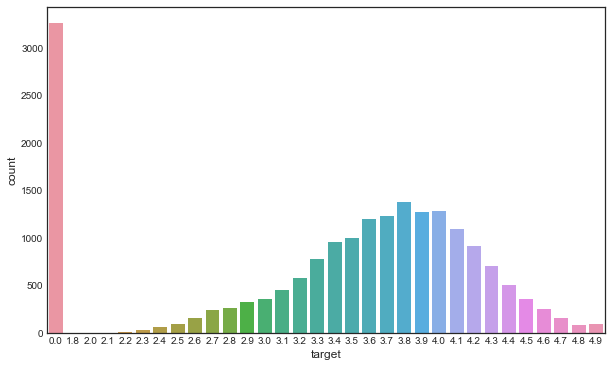

In [34]:
sns.countplot(eda.target)

As we see, there are many **"Not Rated"** restaurants which are by default rated at **ZERO**. Otherwise, this looks like a perfect **normal distribution**.

### *user_rating__rating_text*

In [40]:
pd.crosstab(eda.user_rating__rating_text,eda.target).head(6)

target,0.0,1.8,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
user_rating__rating_text,,,,,,,,,,,,,,,,,,,,,
Average,0,0,0,0,0,0,0,101,156,246,...,0,0,0,0,0,0,0,0,0,0
Baik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bardzo dobrze,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,0,0,0,0,0,0
Belum ada penilaian,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biasa,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Bom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


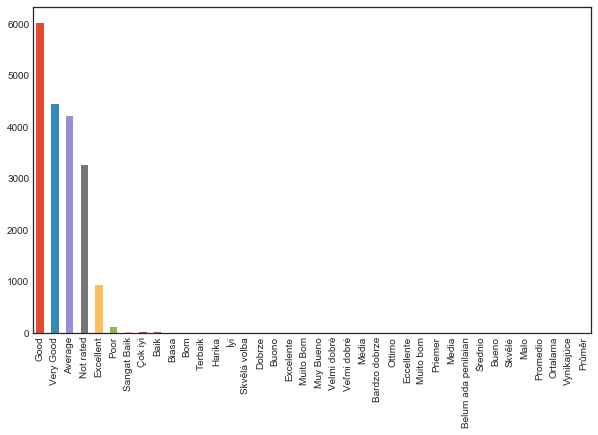

In [38]:
eda.user_rating__rating_text.value_counts().plot(kind = 'bar')

In [32]:
eda_val.user_rating__rating_text.value_counts()[0:5]

Good         6033
Very Good    4454
Average      4213
Not rated    3267
Excellent     935
Name: user_rating__rating_text, dtype: int64

#### From this we can infer that:
1. This feature has **direct relationship** to the ratings range. for eg: ratings for **Good** label always lie between **3.5-4.0** and rating for **Very Good** always lie between **4.0 - 4.5** and so on.
2. However, apart from english labels there are other labels in **different languages** which also have the same relationship to dependant variable. So we will treat this column to **group all language labels to english**.

### Find Obviously Insignificant Columns
#### We can drop columns with:
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1. Highest percent of **MISSING** value<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2. Duplicate or **Redundant** columns<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 3. Columns with almost all **UNIQUE** categories<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 4. Highest percent of single dominating category

#### MISSING VALUES Proportion

In [21]:
eda_na = (eda.isnull().sum() / len(eda)) * 100
eda_na = eda_na.drop(eda_na[eda_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :eda_na})
print("Train_x Shape:",eda.shape)
missing_data.head(20)

Train_x Shape: (19220, 39)


,Missing Ratio
user_rating__rating_tool_tip,98.772112
user_rating__custom_rating_text_background,98.772112
user_rating__custom_rating_text,98.772112
medio_provider,98.293444
zomato_events,97.939646
book_url,97.788762
location__zipcode,68.943809
thumb,40.166493
featured_image,40.166493
currency,0.359001


#### 1. Columns with missing values >70%
'user_rating__rating_tool_tip','user_rating__custom_rating_text_background',<br>'user_rating__custom_rating_text','medio_provider','zomato_events','book_url','location__zipcode'
#### 2. Columns that are duplicate or alias to other columns (we can drop one of these)
'establishment_types__establishment_type__name' **is alias to** 'establishment_types__establishment_type__id'<br>
'location__city_id', 'location__locality', 'location__locality_verbose' **are alias to** 'location__city'<br>
'featured_image' **is alias to** 'thumb
#### 3. Columns that have almost all unique categories
'id', 'name', 'location__latitude', 'location__longitude'
#### 4. Columns with highest percent of Single dominating categories
Let's explore using value counts

In [23]:
#drop columns identified from first three rules
drop_cols = ['user_rating__rating_tool_tip','user_rating__custom_rating_text_background',
'user_rating__custom_rating_text','medio_provider','zomato_events','book_url','location__zipcode',
           'establishment_types__establishment_type__name', 'location__city_id', 'id', 'thumb','featured_image', 'name' ]
eda.drop(drop_cols, axis=1, inplace=True)

In [24]:
eda.columns

Index(['average_cost_for_two', 'cuisines', 'currency',
       'establishment_types__establishment_type__id', 'has_online_delivery',
       'has_table_booking', 'include_bogo_offers', 'is_book_form_web_view',
       'is_delivering_now', 'is_table_reservation_supported',
       'is_zomato_book_res', 'location__address', 'location__city',
       'location__country_id', 'location__latitude', 'location__locality',
       'location__locality_verbose', 'location__longitude', 'mezzo_provider',
       'offers', 'opentable_support', 'price_range', 'switch_to_order_menu',
       'user_rating__rating_text', 'user_rating__votes', 'target'],
      dtype='object')

Split these columns to **Numeric** columns, **Value_count_columns** (for looking at the category distribution) and **geo_columns** as these are more obvious columns.

In [25]:
num_cols = ['average_cost_for_two','user_rating__votes']
val_count_cols = ['has_online_delivery','has_table_booking', 'include_bogo_offers', 'is_book_form_web_view',
       'is_delivering_now', 'is_table_reservation_supported','switch_to_order_menu','opentable_support',
       'is_zomato_book_res','mezzo_provider', 'price_range','user_rating__rating_text', 'offers', 'cuisines', 'currency']
geo_cols = ['establishment_types__establishment_type__id', 'location__city',
            'location__country_id','location__latitude','location__locality','location__locality_verbose','location__longitude']

In [26]:
eda_val = eda[val_count_cols]

In [27]:
eda_val.iloc[:,0:6].apply(pd.Series.value_counts)

,has_online_delivery,has_table_booking,include_bogo_offers,is_book_form_web_view,is_delivering_now,is_table_reservation_supported
0,16875,18795,NaN,19201.0,17546,18696
1,2345,425,19220.0,NaN,1674,524


We can **drop** all the above columns except *'has_online_delivery'*. As we see all of them are **Single Category** dominating columns or otherwise nulls.<br> If a column has only one category, it wont be instrumental in predicting the outcomes.

In [28]:
eda_val.iloc[:,6:9].apply(pd.Series.value_counts)

,switch_to_order_menu,opentable_support,is_zomato_book_res
0.0,19220.0,19201.0,19088
1.0,NaN,NaN,113


We can **drop** all the above columns for the same reason that they are **>99%** data with a single category.

In [31]:
eda_val.iloc[:,9:11].apply(pd.Series.value_counts)

,mezzo_provider,price_range
OTHER,18940.0,NaN
ZOMATO_BOOK,113.0,NaN
BOOKATABLE,83.0,NaN
QUANDOO,53.0,NaN
SEVENROOMS,11.0,NaN
SHAWMAN,1.0,NaN
2,NaN,6380.0
3,NaN,4812.0
4,NaN,4043.0
1,NaN,3985.0


We can drop ***mezzo_provider*** as 98% of observations are of **OTHER** category. <br>
However, we will keep the **price range** as it seems to be evenly distributed and significant.<br>
Lets explore if this has any relation to the **dependant variable**.

In [ ]:
pd.crosstab(eda.price_range, eda.target).plot(kind='bar')

In [33]:
eda_val.offers.value_counts()[0:2]

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            19208
[{'offer': {'offer_id': 710156, 'voucher_id': 4445227, 'offer_text':

There is one category that has highest obeservations and rest all are unique offer codes. For now, we will not take effort in doing feature engineering for this column and drop it.

### Other columns:
We will drop ***'latitude'*** and ***'longitude'*** columns as at this instance, we are not sure how to make use of them in a meaningful way. We have to explore more on that.

### Final list of Columns that has to be dropped
'user_rating__rating_tool_tip','user_rating__custom_rating_text_background','user_rating__custom_rating_text',
             'medio_provider', 'zomato_events', 'book_url','location__zipcode', 'establishment_types__establishment_type__name',
            'location__city_id','featured_image','location__address','location__locality','location__locality_verbose', 'id', 
             'name', 'location__latitude', 'location__longitude', 'include_bogo_offers', 'is_book_form_web_view', 
            'is_table_reservation_supported', 'is_zomato_book_res','mezzo_provider','opentable_support', 'switch_to_order_menu'

#### *currency*

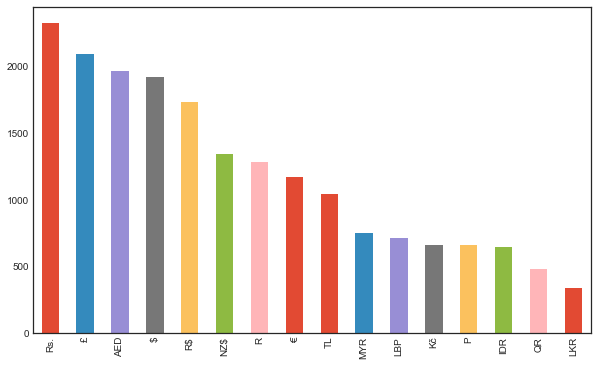

In [100]:
eda.currency.value_counts().plot(kind='bar')

We have to **convert** all currencies to single currency. We will use **US Dollar** as a standard currency.

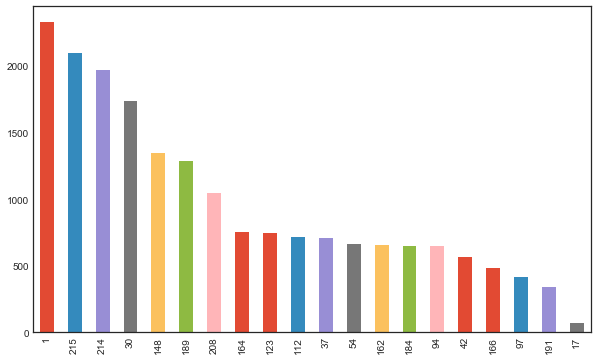

In [102]:
eda.location__country_id.value_counts().plot(kind='bar')

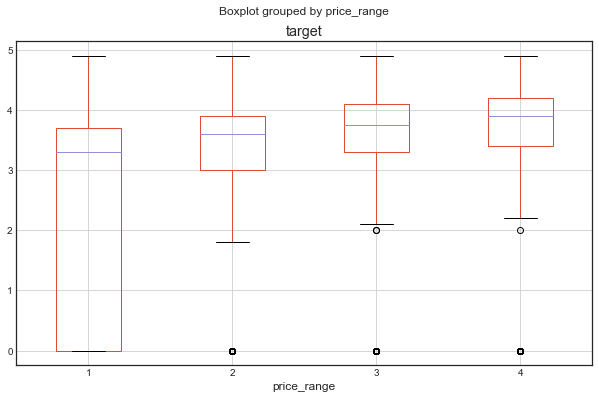

In [116]:
eda.boxplot('target', 'price_range')

From the above graph, we can understand that there are few restaurants that has high rating even when their price range is lower. Also, the boxplot for price range 1 is unevenly ditributed contributing to 0 raitngs.

[Go to Top](#top)

<a id="ref"></a>
## *References*

ML modelling, project flow, Tips and Best Practices - <br>**UC ML videos and workshops**<br>**Hands on Machine Learning using Scikit Learn and Tensorflow** book by **Aurelien Geron**.<br>

Jupyter notebook editing tips - https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>

Project Insights - https://rstudio-pubs-static.s3.amazonaws.com/296592_29cd90970f7f4e18958a215416803927.html<br>
https://www.kaggle.com/lorenzopagliaro01/zomato-restaurants-analysis<br>
https://www.analyticsindiamag.com/the-amazing-way-zomato-uses-data-science-for-success/<br>
